# Training and testing dataset generation using LeR

* `ler` package is used to generate training and testing datasets.

* Uniform distribution of mass, distance, inclination, polarization, spin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import contextlib
from ler.rates import LeR
from ler.utils import append_json, load_json

In [2]:
# initialize the LeR class
# z=2.5 detector horizon 
ler = LeR(
    npool=4,
    z_max=2,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    verbose=False,
    source_priors= {
        'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018',
        'source_frame_masses': 'binary_masses_uniform',
        'zs': 'sampler_uniform',
        'theta_jn': 'sampler_uniform'
        },
    source_priors_params= {
        'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 
        'source_frame_masses': {'m_min': 4.98, 'm_max': 112.5},
        'zs': {'z_min': 0.01, 'z_max': 2},
        'theta_jn': {'min_': 0.0, 'max_': np.pi}
        },
)

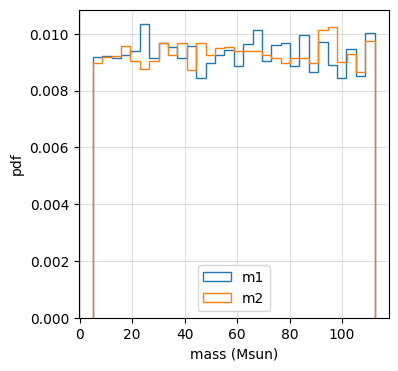

In [3]:
# check for mass distribution
m1, m2 = ler.sample_source_frame_masses(10000)

plt.figure(figsize=(4, 4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('mass (Msun)')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

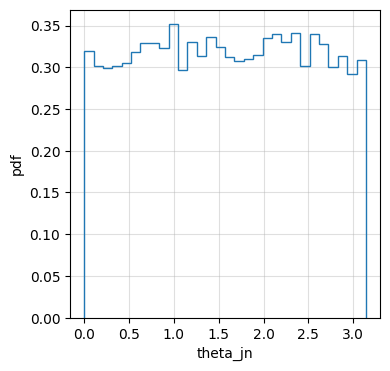

In [4]:
# check for inclination distribution
theta_jn = ler.sample_theta_jn(10000)

plt.figure(figsize=(4, 4))
plt.hist(theta_jn, bins=30, histtype='step', density=True)
plt.xlabel('theta_jn')
plt.ylabel('pdf')
plt.grid(alpha=0.4)
plt.show()

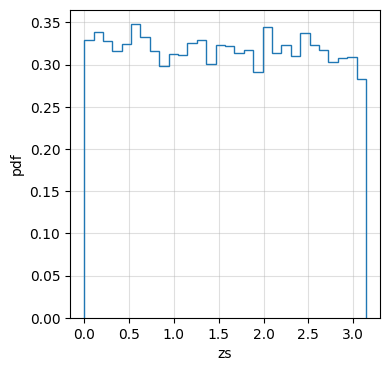

In [5]:
# sample zs
zs = ler.sample_zs(10000)

plt.figure(figsize=(4, 4))
plt.hist(zs, bins=30, histtype='step', density=True)
plt.xlabel('zs')
plt.ylabel('pdf')
plt.grid(alpha=0.4)
plt.show()

## Collection of data at the desired SNR range

In [8]:
# This is data collection based of 'optimal snr net' range
 
ler.batch_size = 100000

len_ = 0
while len_<200000:
    with contextlib.redirect_stdout(None):
        unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=False)
    snr = np.sqrt(unlensed_param["L1"]**2 + unlensed_param["H1"]**2 + unlensed_param["V1"]**2)

    idx2 = np.argwhere((snr>=2) & (snr<4)).flatten()
    idx3 = np.argwhere((snr>=4) & (snr<6)).flatten()
    idx4 = np.argwhere((snr>=6) & (snr<8)).flatten()
    idx5 = np.argwhere((snr>=8) & (snr<10)).flatten()
    idx6 = np.argwhere((snr>=10) & (snr<12)).flatten()
    idx7 = np.argwhere((snr>=12) & (snr<14)).flatten()
    idx8 = np.argwhere((snr>=14) & (snr<16)).flatten()
    idx16 = np.argwhere(snr>=16).flatten()

    unlensed_param2 = {}
    unlensed_param3 = {}
    unlensed_param4 = {}
    unlensed_param5 = {}
    unlensed_param6 = {}
    unlensed_param7 = {}
    unlensed_param8 = {}
    unlensed_param16 = {}
    unlensed_param_joint = {}

    len_idx16 = len(idx16)

    for key, value in unlensed_param.items():
        if len(idx2)>len_idx16:
            unlensed_param2[key] = value[idx2][:len_idx16]
        else:
            unlensed_param2[key] = value[idx2]
        if len(idx3)>len_idx16:
            unlensed_param3[key] = value[idx3][:len_idx16]
        else:
            unlensed_param3[key] = value[idx3]
        if len(idx4)>len_idx16:
            unlensed_param4[key] = value[idx4][:len_idx16]
        else:
            unlensed_param4[key] = value[idx4]
        if len(idx5)>len_idx16:
            unlensed_param5[key] = value[idx5][:len_idx16]
        else:
            unlensed_param5[key] = value[idx5]
        if len(idx6)>len_idx16:
            unlensed_param6[key] = value[idx6][:len_idx16]
        else:
            unlensed_param6[key] = value[idx6]
        if len(idx7)>len_idx16:
            unlensed_param7[key] = value[idx7][:len_idx16]
        else:
            unlensed_param7[key] = value[idx7]
        if len(idx8)>len_idx16:
            unlensed_param8[key] = value[idx8][:len_idx16]
        else:
            unlensed_param8[key] = value[idx8]
        unlensed_param16[key] = value[idx16]
        unlensed_param_joint[key] = np.concatenate([unlensed_param2[key], unlensed_param3[key], unlensed_param4[key], unlensed_param5[key], unlensed_param6[key], unlensed_param7[key], unlensed_param8[key], unlensed_param16[key]])

    append_json("joint_new_optsnr_uniform.json", unlensed_param_joint, replace=False)
    unlensed_params = load_json("joint_new_optsnr_uniform.json")
    len_ = len(np.array(unlensed_params["optimal_snr_net"]))

    print(f"Number of events: {len_}")

  0%|                                                                     | 0/26965 [00:00<?, ?it/s]

Number of events: 141034


  0%|                                                                     | 0/27171 [00:00<?, ?it/s]

Number of events: 164583


  0%|                                                                     | 0/27086 [00:00<?, ?it/s]

Number of events: 188235


100%|████████████████████████████████████████████████████████| 27086/27086 [00:28<00:00, 963.52it/s]


Number of events: 211911


In [39]:
# getting data
#unlensed_params = load_json("joint_new_optsnr.json")
unlensed_params = load_json("joint_new_optsnr_uniform.json")

In [40]:
# checking the length of the data
len(np.array(unlensed_params["zs"]))

70617

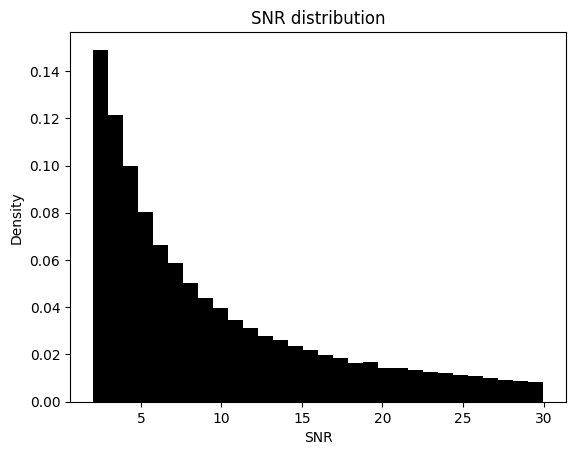

In [43]:
# plotting the SNR distribution (net)
test = np.array(unlensed_params["optimal_snr_net"])
test = test[test<30]
plt.hist(test, bins=30, color='k', density=True)
plt.xlabel("SNR")
plt.ylabel("Density")
plt.title("SNR distribution")
#plt.xlim(0, 100)
plt.show()


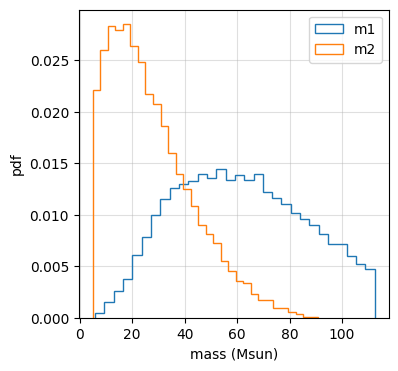

In [36]:
# mass
m1 = np.array(unlensed_params["mass_1_source"])
m2 = np.array(unlensed_params["mass_2_source"])

plt.figure(figsize=(4, 4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('mass (Msun)')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.4)
plt.show()